In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import librosa
from librosa import display
import IPython.display as ipd
from util import classes as cls

In [2]:
def samples_per_beat(bpm, sr):
    return (60 / bpm) * sr

def create_ssm(cqt):
    R2 = librosa.segment.recurrence_matrix(cqt, width=1, mode='affinity', sym=True, self=True)
    R2 = librosa.segment.path_enhance(R2, 10, window='hann', n_filters=5)
    return R2

In [21]:
song1 = cls.Song('/dataset/YTCdataset/letitbe/v0.mp3')
song2 = cls.Song('/dataset/YTCdataset/letitbe/v2.mp3')

/usr/local/lib/python3.5/dist-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/usr/local/lib/python3.5/dist-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [22]:
hop_length = 2**12
cqt1 = song1.chroma_cqt(hop_length=hop_length)
cqt2 = song2.chroma_cqt(hop_length=hop_length)

ssm1 = create_ssm(cqt1)
ssm2 = create_ssm(cqt2)

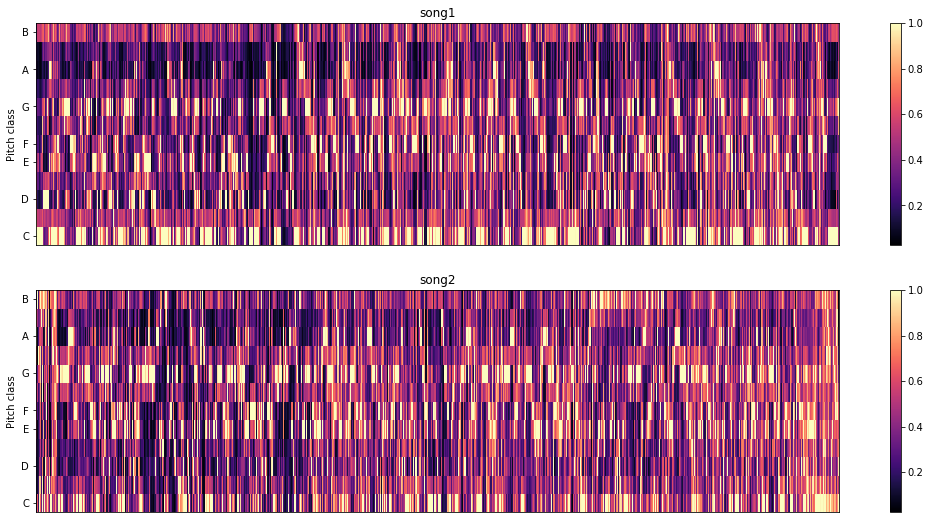

In [23]:
plt.figure(figsize=(18, 9))
plt.subplot(2, 1, 1)
display.specshow(cqt1, y_axis='chroma')
plt.title('song1')
plt.colorbar()
plt.subplot(2, 1, 2)
display.specshow(cqt2, y_axis='chroma')
plt.title('song2')
plt.colorbar()
plt.show()

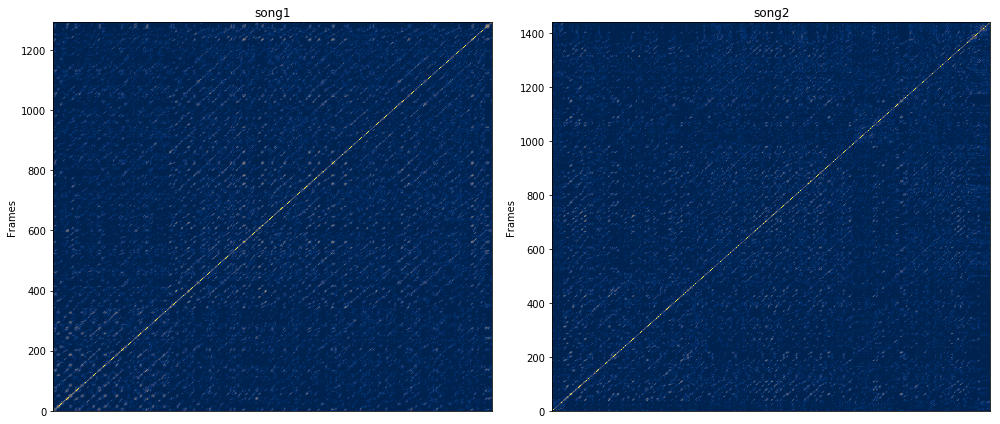

In [24]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
librosa.display.specshow(ssm1, cmap='cividis', y_axis='frames')
plt.title('song1')
plt.subplot(1, 2, 2)
librosa.display.specshow(ssm2, cmap='cividis', y_axis='frames')
plt.title('song2')
plt.tight_layout()

In [25]:
song1.y.size/ssm1[0].size
s1 = samples_per_beat(song1.tempo, song1.sr)/(song1.y.size/ssm1[0].size)
s2 = samples_per_beat(song2.tempo, song2.sr)/(song2.y.size/ssm2[0].size)
s1, s2

(2.251596360253239, 2.5014555181441023)

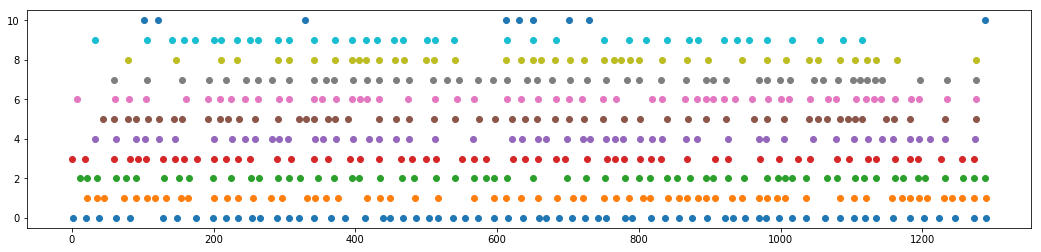

In [29]:
song1.create_profile(ssm1, [1, 2, 3, 4, 6, 8, 10, 12, 16, 32, 64])
song1.profile.plot_peaks()


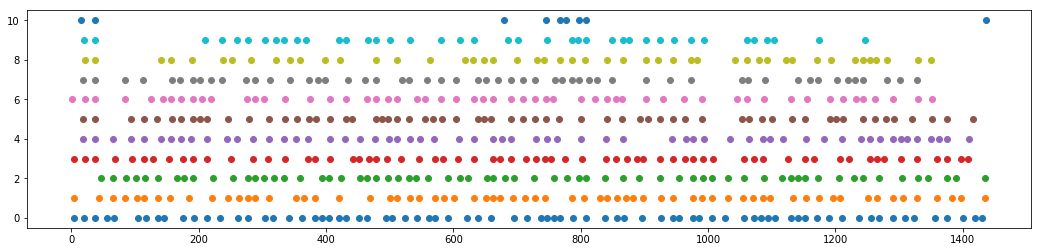

In [27]:
song2.create_profile(ssm2, [1, 2, 3, 4, 6, 8, 10, 12, 16, 32, 64])
song2.profile.plot_peaks()

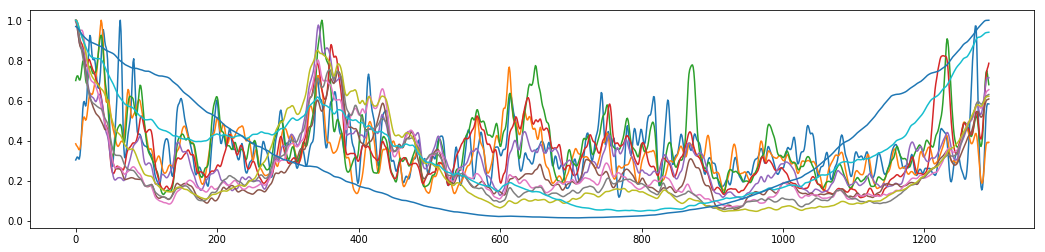

In [28]:
song1.profile.plot_profiles()

/usr/local/lib/python3.5/dist-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


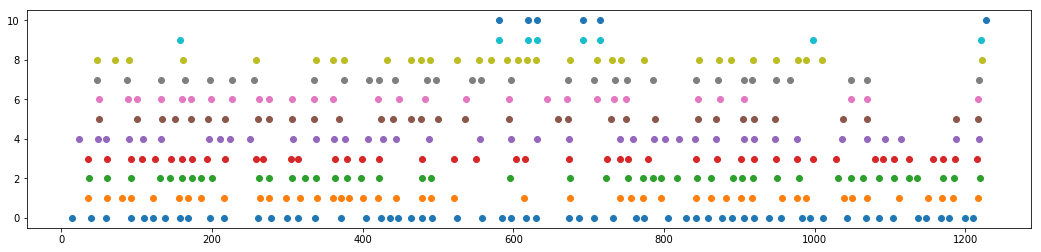

In [11]:
song3 = cls.Song('/dataset/coversongs/covers32k/Take_On_Me/a_ha+Hunting_High_and_Low+01-Take_On_Me.mp3')
cqt3 = song3.chroma_cqt(hop_length=hop_length)
ssm3 = create_ssm(cqt3)
song3.create_profile(ssm3, [1, 2, 3, 4, 6, 8, 10, 12, 16, 32, 64])
song3.profile.plot_peaks()


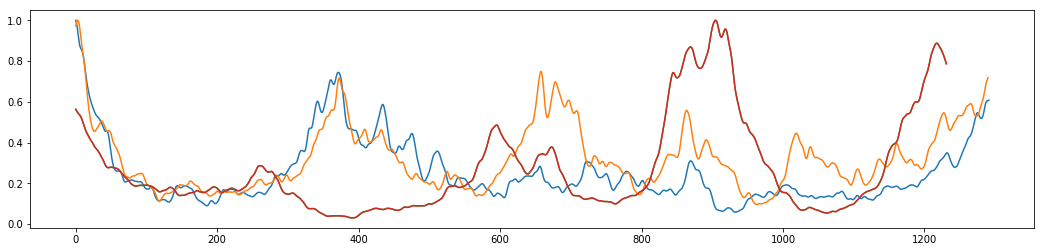

In [20]:
from util import ssm_novelty as ssm
plt.figure(figsize=(18, 4))
for song in [song1, song2, song3, song4
plt.plot(ssm.normalize_rows(song1.profile.profiles[5]))
plt.plot(ssm.normalize_rows(song2.profile.profiles[5]))
plt.plot(ssm.normalize_rows(song3.profile.profiles[5]))
plt.plot(ssm.normalize_rows(song3.profile.profiles[5]))
#plt.plot(ssm.normalize_rows(x1c))
plt.show()

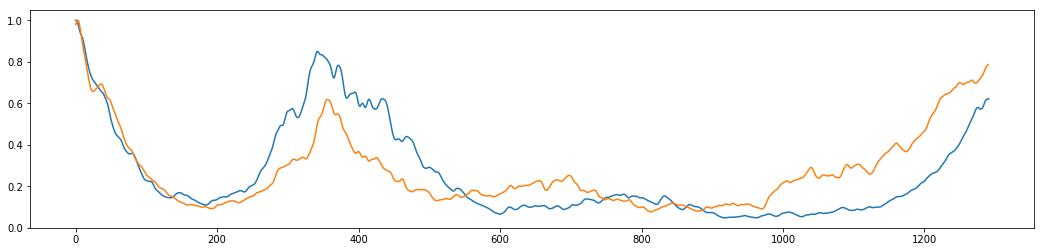

In [119]:
plt.figure(figsize=(18, 4))
plt.plot(ssm.normalize_rows(x1c))
plt.plot(ssm.normalize_rows(z1c))
plt.show()


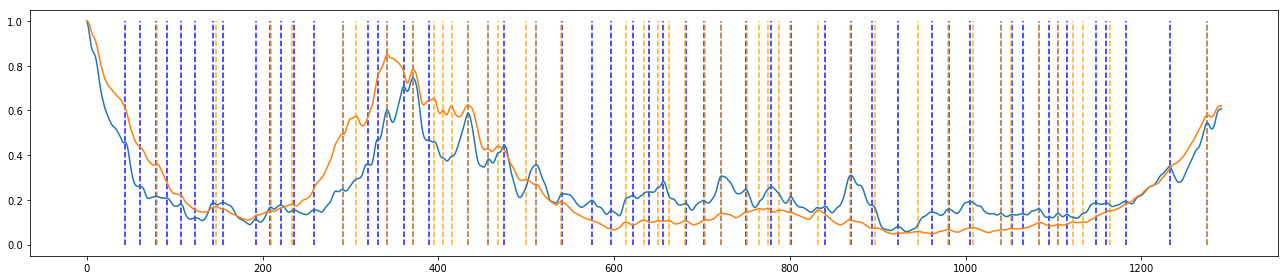

In [125]:
x1a_pk = scipy.signal.find_peaks(x1a, height=0.08, distance=10)[0]
x1b_pk = scipy.signal.find_peaks(x1b, height=0.08, distance=10)[0]
x1c_pk = scipy.signal.find_peaks(x1c, height=0.08, distance=10)[0]

plt.figure(figsize=(18, 4))
plt.plot(ssm.normalize_rows(x1b))
plt.plot(ssm.normalize_rows(x1c))
plt.vlines(x1b_pk, 0, 1, color='b', alpha=0.9, linestyle='--', label='Onsets')
plt.vlines(x1c_pk, 0, 1, color='orange', alpha=0.9, linestyle='--', label='Onsets')

plt.tight_layout()


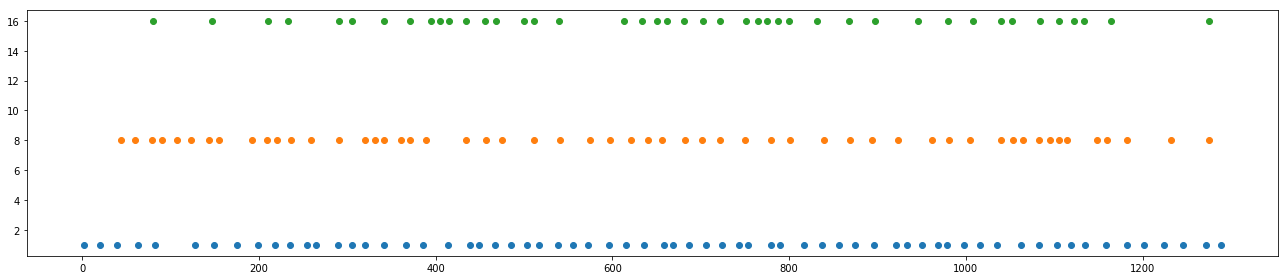

In [126]:
plt.figure(figsize=(18, 4))
plt.plot(x1a_pk, (x1a_pk/x1a_pk), 'o')
plt.plot(x1b_pk, (x1b_pk/x1b_pk)*8, 'o')
plt.plot(x1c_pk, (x1c_pk/x1c_pk)*16, 'o')
plt.tight_layout()

In [109]:
s3 = samples_per_beat(song3.tempo, song3.sr)/(song3.y.size/ssm3[0].size)
L3 = int(s3 * 8)
a1a = ssm.compute_novelty_SSM(ssm3, kernel=ssm.compute_kernel_checkerboard_box(L=L3))
a1b = ssm.compute_novelty_SSM(ssm3, kernel=ssm.compute_kernel_checkerboard_box(L=int(L3*8)))
a1c = ssm.compute_novelty_SSM(ssm3, kernel=ssm.compute_kernel_checkerboard_box(L=int(L3*16)))



/usr/local/lib/python3.5/dist-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


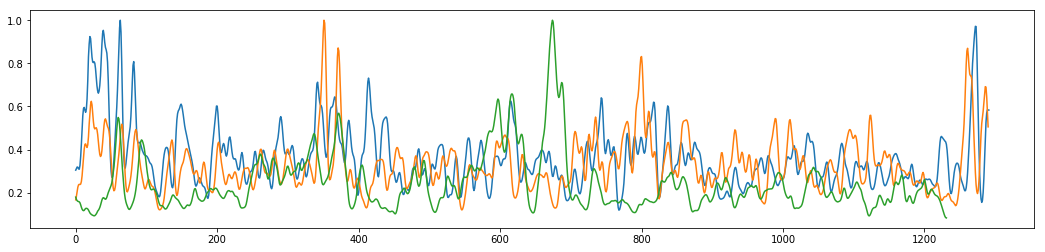

In [112]:
plt.figure(figsize=(18, 4))
plt.plot(ssm.normalize_rows(x1a))
plt.plot(ssm.normalize_rows(z1a))
plt.plot(ssm.normalize_rows(a1a))
plt.show()

In [142]:
arr = [1,2,3,4]
np.arange(len(arr))

array([0, 1, 2, 3])